In [251]:
import pandas as pd
import json
import csv
import numpy as np
from collections import Counter
from collections import defaultdict

## Functions 
### Load Data

In [2]:
def parse_json_file(filename):
    data = []
    with open(filename) as file:
        for line in file:
            data.append(json.loads(line))
    return data

### Generate small subsets of data 
**filter_user:** <br>
generate a subset of users that has at least friend_num friends and review_count reviews

In [3]:
def filter_user(friend_num, review_count, all_users):
    ret_list = list()
    for user in all_users:
        if (str(user['friends']) == "None"):
            user['friendsNum'] = 0
        else :
            if (type(user['friends']) != list):
                user['friends'] = user['friends'].split(',')
            user['friendsNum'] = len(user['friends'])
            if (user['friendsNum'] > friend_num and user['review_count'] > review_count):
                ret_list.append(user)
    return ret_list

In [4]:
def load_user_restaurants_pair(filename):
    user_to_business = {}
    with open(filename) as file:
        for line in file:
            items = line.split(",")
            user_to_business[items[0]] = items[1]
    return user_to_business

In [202]:
#HARD CODED  Neighbor_num and total_record_num

def load_neighbors(filename):
    neighbours = [[ [ 0.0 for i in xrange(10) ] for j in xrange(64575) ] for z in xrange(2)]
    with open(filename) as file:
        
        for line in file:
            items = line.split(",")
            if i % 9 is 0:
                neighbours[0][int(items[0])][0] = 0.0 # distance with itself is 0
                neighbours[1][int(items[0])][0] = int(items[0]) # its own id
            neighbours[0][int(items[0])][i % 9 + 1] = float(items[2])
            neighbours[1][int(items[0])][i % 9 + 1] = int(items[1])

    return neighbours


In [234]:
def load_user_to_restaurants(filename):
    user_to_restaurants = {}
    with open(filename) as file:
        for line in file:
            items = line.split(",")
            user_to_restaurants[items[0]]= items[1:]
    return user_to_restaurants

neighbours[0] -> all the distances <br>
neighbours[1] -> coresponding nodes <br>
neighbours[1][0] -> all the neighbors of 0 <br>

In [262]:
def load_user_average_rating(users, userids):
    user_to_rating = defaultdict(float)
    for user in users:
        if user['user_id'] in userids:
            user_to_rating[user['user_id']] = float(user['average_stars'])
    return user_to_rating

In [282]:
user_to_rating = load_user_average_rating(all_users, filtered_user_ids)

In [283]:
len(user_to_rating)

64575

In [285]:
with open('yelp-dataset/yelp_user_id_avg_rating_64575.txt', 'w') as file:
    for k,v in user_to_rating.items():
        file.write(k + "," + str(v) + "\n")

### Clean Data

In [5]:
# data is consist of json objects
# attributes are a list of strings
def drop_attributes(attributes, data):
    for attribute in attributes:
        for element in data:
            if attribute in element:
                del element[attribute]
    return data

In [215]:
# selected users: set of user ids
# data: reviews
def get_user_restaurants_pair(data, selected_users):
    user_to_restaurants = defaultdict(set)
    for review in data:
        if review['user_id'] in selected_users:
            user_to_restaurants[review['user_id']].append(review['business_id'])
    return user_to_restaurants

In [217]:
def get_user_friends_pair(users, user_ids):
    user_to_friends = defaultdict(list)
    for user in users:
        friends = user['friends']
        for friend_id in friends:
            user_to_friends[user['user_id']].append(friend_id)
    return user_to_friends

### Output file

In [8]:
def output_json_to_file(data, filename):
    with open(filename, 'w') as outfile:
        for item in data:
            json.dump(item, outfile)
            outfile.write("\n")

In [9]:
def output_list_to_file(data, filename):
    with open(filename, 'w') as outfile:
        for item in data:
            outfile.write(item)
            outfile.write("\n")

## Pre Processing

In [253]:
all_users = parse_json_file('yelp-dataset/yelp_academic_dataset_user.json')

In [278]:
filtered_user_ids = set()
with open('yelp-dataset/yelp_userids_64575.txt') as file:
    for line in file:
        filtered_user_ids.add(line[0:len(line) - 1])
len(filtered_user_ids)

64575

In [ ]:
filtered_user_with_10_friends_and_20_reviews = filter_user(10,20,all_users)
len(filtered_user_with_10_friends_and_20_reviews) # 184704  about 12.166234457428653 % of total users 

### Split Data to smaller datasets to run notebook online

In [32]:
outfiles = list()
for i in range(1, 11):
    outfiles.append(open('filtered_user_with_10_friends_and_20_reviews' + str(i) + '.json', 'w'))

In [ ]:
i = 0
for item in filtered_user_with_10_friends_and_20_reviews:
    json.dump(item, outfiles[i % 10])
    outfiles[i % 10].write("\n")
    i += 1

for outfile in outfiles:
    outfile.close()

In [ ]:
output_json_to_file(filtered_user_with_10_friends_and_20_reviews, 'yelp-dataset/filtered_user_with_10_friends_and_20_reviews.json')

### Clean business datasets 

In [7]:
all_business = parse_json_file('yelp-dataset/yelp_academic_dataset_business.json')

In [19]:
business_attributes_to_drop = ("name", "neighborhood","postal_code","address", "postal code", "latitude", "longitude", "stars", "is_open", "hours")
all_business_cleaned = drop_attributes(business_attributes_to_drop, all_business)

In [26]:
output_json_to_file(all_business_cleaned, 'yelp-dataset/yelp_dataset_business_cleaned.json')

Sample Business Dictionary (id to business json object) 
```
{u'XK06r20NglrTn7OcZ2FQzA': {u'attributes': {u'BikeParking': u'True',
   u'BusinessAcceptsCreditCards': u'False',
   u'BusinessParking': u"{'garage': False, 'street': True, 'validated': False, 'lot': False, 'valet': False}",
   u'WheelchairAccessible': u'False'},
  u'business_id': u'XK06r20NglrTn7OcZ2FQzA',
  u'categories': u'Shopping, Local Services, Electronics Repair, Musical Instruments & Teachers',
  u'city': u'Toronto',
  u'review_count': 3,
  u'state': u'ON'},
 ```

In [73]:
business_dict = {}
for item in all_business_cleaned:
    key = item['business_id']
    business_dict[key] = item

### Select Subset of Reviews Selected Users Wrote

In [49]:
all_reviews = parse_json_file('yelp-dataset/yelp_academic_dataset_review.json')

In [212]:
filtered_users = parse_json_file('filtered_user_with_10_friends_and_20_reviews.json')

In [213]:
filtered_userids = []
for item in filtered_users:
    filtered_userids.append(item['user_id'])
userid_set = set(filtered_userids)

In [43]:
output_list_to_file(filtered_userids, 'yelp_userids.txt')

In [218]:
filtered_user_to_friend = get_user_friends_pair(filtered_users, userid_set)

In [65]:
with open('yelp-dataset/yelp_selected_user_to_businesses.txt', 'w') as outfile:
    for key, val in user_restaurants.items():
        for busi in val:
            outfile.write(key + "," + busi + "\n")

### Get User to Friends Dict

In [45]:
user_friends = get_user_friends_pair(filtered_users, filtered_userids)

In [46]:
with open('yelp-dataset/yelp_user_to_friend.txt', 'w') as outfile:
    for key, val in user_friends.items():
        for friend in val:
            outfile.write(key + "," + friend + "\n")

#### Get users and their friends id set
This will be used to generate user restaurant pair 

In [47]:
selected_users_n_friends = set() # 7907480
for key, val in user_friends.items():
    selected_users_n_friends.add(key)
    for friend in val:
        selected_users_n_friends.add(friend)

In [51]:
user_n_friends_restaurants = get_user_restaurants_pair(all_reviews, selected_users_n_friends)

user_n_friends_restaurants_items = user_n_friends_restaurants.items()

#### user_id, restaurant_id1, restaurant_id2, restaurant_id3, .....

In [56]:
with open('yelp-dataset/yelp_selected_user_n_friend_to_businesses.txt', 'w') as outfile:
    for key, val in user_n_friends_restaurants_items:
        line = key + ","
        for i in range(1, len(val)):
            line += val[i] + ","
        outfile.write(line + val[len(val) - 1] + "\n")

## Generate User Vector Based on Restaurant They rated

In [181]:
user_restaurants = user_restaurants.items()

In [66]:
user_restaurants_small = user_restaurants.items()[1:100]

In [102]:
def set_attribute_if_not_exist(user, attribute):
    if attribute not in user:
        user[attribute] = 1
    else:
        user[attribute] += 1
    return user

In [139]:
def has_sub_attribute(sub_attribute, attribute):
    if sub_attribute in attribute:
        return attribute[sub_attribute] == 'True'
    return False

In [140]:
def get_type(categories):
    print(type(categories))

 ### Create the user vector 
Return: List of User Json objects that contains user's attributes <br>
Example : user1 { 'Mexican': 10, 'Chinese': 2}

In [185]:
users_attributes = []

for key, val in user_restaurants:
    curr_user = {}
    curr_user['user_id'] = key
    curr_user['restaurant_count'] = len(val)
    for busi_id in val:
        curr_business = business_dict[busi_id]
        set_attribute_if_not_exist(curr_user, curr_business['state'])
        curr_busi_attrs = curr_business['attributes']
        if type(curr_busi_attrs) is dict:
            if 'Alcohol' in curr_busi_attrs and curr_busi_attrs['Alcohol']!= 'None':
                set_attribute_if_not_exist(curr_user, 'Alcohol')
            
            attributes_selected = ('RestaurantsGoodForGroups',
                                  'GoodForKids', 
                                  'HasTV',
                                  'OutdoorSeating', 
                                  'BusinessAcceptsCreditCards',
                                  'RestaurantsDelivery')
            for attri_selected in attributes_selected:
                if has_sub_attribute(attri_selected, curr_busi_attrs):
                    set_attribute_if_not_exist(curr_user, attri_selected)
            
            if 'RestaurantsPriceRange2' in curr_busi_attrs:
                    price_range = curr_busi_attrs['RestaurantsPriceRange2']
                    set_attribute_if_not_exist(curr_user, 'PriceRange_'+ price_range)
        
            if 'BusinessParking' in curr_busi_attrs:
                parking = curr_busi_attrs['BusinessParking']
                if 'True' in parking:
                    set_attribute_if_not_exist(curr_user, 'HasParking')
                    
        if type(curr_business['categories']) is unicode:         
            curr_categories = curr_business['categories'].split(",")
        for cate in curr_categories:
            set_attribute_if_not_exist(curr_user, cate)
    users_attributes.append(curr_user)
        

In [190]:
output_json_to_file(users_attributes, 'yelp-dataset/yelp_dataset_user_attributes.json')

### Normalize the attributes 

We counted the restaurant attributes each user visited. <br> In order to calculate the distance between them, I would like to normalize the count by dividing each count with the number restaurant user reviewed. The result would display a percentage of time user reviewed in certain type of restaurants. 

In [193]:
users_normalized_attributes =  users_attributes # keep it unnormalized

In [286]:
for user in users_normalized_attributes:
    length = int(user['restaurant_count'])
    for k, v in user.items():
        if k is not 'restaurant_count' and k is not 'user_id':
            user[k] = float(v * 100) / length

NameError: name 'users_normalized_attributes' is not defined

In [200]:
user_normalized = users_attributes

In [201]:
output_json_to_file(user_normalized, 'yelp-dataset/yelp_dataset_user_normalized_attributes.json')

In [202]:
df = pd.DataFrame(user_normalized)
df.replace(np.nan, 0, inplace = True)

In [203]:
df.head()

,& Probates,3D Printing,ATV Rentals/Tours,Acai Bowls,Accessories,Accountants,Acne Treatment,Active Life,Acupuncture,Addiction Medicine,...,Workers Compensation Law,Wraps,XGM,XMS,Yelp Events,Yoga,Ziplining,Zoos,restaurant_count,user_id
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,C3tqbv3fH5fCLbujgVAqLQ
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.545455,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,22,gLV4VXc4k_WF9ElByOdE5Q
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,tFpLr6dnSoh3KgyjVnlBhw
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5,MPaWnzh94qmtdjMMrGpSCw
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,TSFDRxY6Fvb8o9ylq-9Jzg


In [208]:
df_userid = df['user_id']
# df_userid.iloc[1]
df.drop(columns = 'user_id') # need to drop user_id to calcuate t

### Kth Nearest Neighbors 
Based on the vector we previously used to represent each user, we now use the knn model to find the closest 10 users of the current user. The distance between two users are defined with euclidean distance

In [7]:
from sklearn.neighbors import NearestNeighbors
import time

In [287]:
# shortcut after storing normalized user attributes locally 
curr_time = time.time()
user_normalized = parse_json_file('yelp-dataset/yelp_dataset_user_normalized_attributes.json')
user_5 = []
for user in user_normalized:
    if user['restaurant_count'] > 5:
        user_5.append(user)

In [9]:
df = pd.DataFrame(user_5)
df.replace(np.nan, 0, inplace = True)
df_userid = pd.DataFrame(df['user_id'])
df.drop(columns = 'user_id', inplace = True) 
print("time taken: " + str(time.time() - curr_time))

time taken: 52.2914040089


In [19]:
df_normalized = pd.DataFrame(user_normalized)

In [10]:
selected_users = set(df_userid['user_id'].tolist())

In [82]:
# check number of cells for curr column that is not 0
# df.astype(bool).sum(axis=0)

In [34]:
curr_time = time.time()
model = NearestNeighbors(n_neighbors=10, p=2) # p = 2 -> euclidean distance
model.fit(df) 
time_taken = float(time.time() - curr_time)/60
print("time taken: " + str(time_taken) + " min")

time taken: 0.561400536696 min


In [ ]:
curr_time = time.time()
neighbors = model.kneighbors(df, return_distance=True)

In [36]:
time_taken = float(time.time() - curr_time)/60
print("time taken: " + str(time_taken) + " min")

time taken: 194.273444851 min


In [201]:
# shortcut after generated the user knn file
load_neighbors('yelp-dataset/yelp_user_knn.txt')

### Save the KNN (9 neighbors) to file

In [80]:
total_selected_user = len(neighbours[0])
with open('yelp-dataset/yelp_userid_knn_corrected.txt', 'w') as outfile:
    for i in range(0, total_selected_user):
        for j in range(1, 10):
            outfile.write(str(df_userid.iloc[neighbours[1][i][0]]) + ',' + str(df_userid.iloc[neighbours[1][i][j]]) + ',' + str(neighbours[0][i][j]) + '\n')

### Concat the restaurants visited by user, user's neighbors and user's friends

In [210]:
# outdated version: user_to_restaurants = load_user_restaurants_pair('yelp-dataset/yelp_selected_user_to_businesses.txt')

In [235]:
user_to_rests = load_user_to_restaurants('yelp-dataset/yelp_selected_user_n_friend_to_businesses.txt')

### output format
*user_id, potential_restaurant_id1, potential_restaurant_id2, potential_restaurant_id3, potential_restaurant_id4.....*

### Extract Potential Restaurant User Might Be Interested

In [249]:
# total_selected_user = len(df_userid)
# filtered_user_to_friend

64575

In [250]:
with open('yelp-dataset/yelp_user_potential_restaurants_sample_all.txt', 'w') as outfile:
    for i in range(0, total_selected_user):
        curr = df_userid.loc[neighbours[1][i][0],'user_id']
        outfile.write(curr + ',')
        for j in range(1, 10):
            curr_neighbor_id = df_userid.loc[neighbours[1][i][j], 'user_id']
            curr_rests = user_to_rests[curr_neighbor_id]
            for k in range(1,len(curr_rests)):
                outfile.write(curr_rests[k] + ',')
            outfile.write(curr_rests[len(curr_rests) - 1])
            
        friends = filtered_user_to_friend[curr]
        for j in range(1, len(friends)):
            if friends[j] in user_to_rests:
                curr_rests = user_to_rests[friends[j]]
                print(curr_rests)
                for k in range(1,len(curr_rests)):
                    outfile.write(curr_rests[k] + ',')
                outfile.write(curr_rests[len(curr_rests) - 1])
        outfile.write('\n')

### Get prediction top 20 attributes

In [193]:
def get_predict_top_20_attributes(neighbors, total_selected_user):
### Get the top 20 Attributes user might be interested based on the interest of its similar user
    users_predict_result = []
    for i in range(0, total_selected_user):
        # user's neighbors(excluding user itself) attributes that are not 0
        df_sub = df.iloc[neighbors[1][i][1:]]
        df_attri = df_sub.loc[:, (df_sub > 0).any()]
        df_predictions = pd.DataFrame(df_attri.sum(axis=0))
        df_predictions.columns = ['Score']
        
        # sort by score value (score is the sum of normalized score of all 9 users)
        prediction_res = df_predictions.sort_values(['Score'], ascending=[0]).iloc[0:20]
        top_20_types = prediction_res.index.values
        
        curr_user = {}
        curr_id = df_userid.loc[i,'user_id']
        
        for j in range(0, 20):
            if top_20_types[j] != 'restaurant_count':
                curr_user[top_20_types[j]] = prediction_res.loc[top_20_types[j],'Score']
        curr_user[unicode('user_id')] = curr_id      
        users_predict_result.append(curr_user)
        
    return users_predict_result

In [194]:
users_predict_result = get_predict_top_20_attributes(neighbours, 100)

In [195]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [196]:
def create_word_cloud(user):
    user_no_id = user
    curr_id = user['user_id']
    user_no_id.pop('user_id', None)
    
    wordcloud = WordCloud(background_color='white').generate_from_frequencies(user_no_id)
    
    user_no_id['user_id'] = curr_id
    return wordcloud

In [197]:
def plot_word_cloud(wordcloud, curr_id):
    plt.imshow(wordcloud)
    plt.axis('off')
    
    loc = 'yelp-dataset/wordcloud/' + curr_id +'.png'
    plt.savefig(loc, facecolor='white', transparent=True)

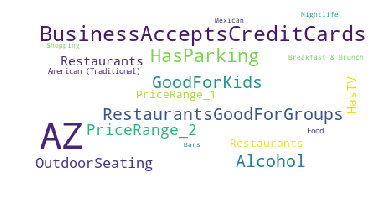

In [199]:
for user in users_predict_result:
    wordcloud = create_word_cloud(user)
    plot_word_cloud(wordcloud, user['user_id'])

In [105]:
# top_20_result = type_result.iloc[1:21]
# all_types = top_20_result.index.values
# curr_user = {}
# curr_user['user_id'] = df_userid.iloc[10]
# for i in range(0, 20):
#     if all_types[i] != 'restaurant_count':
#         curr_user[all_types[i]] = top_20_result.loc[all_types[i],'Score']